In [33]:
import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


def load_json(file_path):
    with open(f"{file_path}") as f:
        data = json.load(f)
    return data

def write_json(data, file_path):
    with open(f"{file_path}", "w") as f:
        json.dump(data, f, indent=4)

def load_csv(file_path):
    with open(file_path, "r") as f:
        # split by ;
        data = f.readlines()
        header = data[0].split(";")
        data = [line.split(";") for line in data[1:]]
        data = [dict(zip(header, line)) for line in data]
    return data


def approach_to_regular_name(approach: str):
    match approach:
        case "HTML":
            return "HTML"
        case "CSV":
            return "CSV"
        case "JSON-RECORDS":
            return "JSON-Records"
        case "MARKDOWN":
            return "Markdown"
        case _:
            return approach

### Primary Subtree Selection

In [34]:
data = load_json("../data/evaluation/evaluation_results-2025-03-11-03-17-07.json")["evaluation_results"]

dataset_analysis = load_json("../data/evaluation/dataset_analysis/analysis-2025-03-11-12-08-16.json")

samples = 4
print(f"Primary Subtree Approach\nResults for GPT4o-mini in {samples} samples with 50 questions each:\n")

for i, model in enumerate(data[1:]):
    
    name = " ".join(word.capitalize() for word in model["name"].replace("primary-subtree-tabtree-text-", "").split("-"))
    # extract 'column-header-tree' from 'primary-subtree-tabtree-text-column-header-tree'
    print(f"Approach: {name}")
    
    qa_results = model["qa_only_results"]["qa_results"]
    
    official_accuracies = [qa_result["official_accuracy"] for qa_result in qa_results[:samples]] 
    f1_scores = [qa_result["f1_score"] for qa_result in qa_results[:samples]]
    print(f"  Execution Accuracy: {np.mean(official_accuracies):.2f} $\\pm$ {np.std(official_accuracies):.2f}")
    print(f"  F1-score: {np.mean(f1_scores):.2f} $\\pm$ {np.std(f1_scores):.2f}")
    
    token_avg = dataset_analysis[i]["dataset_summary"]["token_statistics"]["avg"]
    token_std = dataset_analysis[i]["dataset_summary"]["token_statistics"]["std"]
    print(f"  Token Count: {int(token_avg)} $\\pm$ {int(token_std)}")

Primary Subtree Approach
Results for GPT4o-mini in 4 samples with 50 questions each:

Approach: Heuristic
  Execution Accuracy: 0.62 $\pm$ 0.06
  F1-score: 0.66 $\pm$ 0.04
  Token Count: 8344 $\pm$ 18133
Approach: Column Header Tree
  Execution Accuracy: 0.60 $\pm$ 0.07
  F1-score: 0.65 $\pm$ 0.07
  Token Count: 4479 $\pm$ 7283
Approach: Row Label Tree
  Execution Accuracy: 0.53 $\pm$ 0.02
  F1-score: 0.57 $\pm$ 0.02
  Token Count: 8835 $\pm$ 18275
Approach: Concatenate
  Execution Accuracy: 0.65 $\pm$ 0.03
  F1-score: 0.69 $\pm$ 0.03
  Token Count: 13370 $\pm$ 24501


In [35]:
data_phi = load_json("../data/evaluation/evaluation_results-2025-03-11-16-37-01.json")["evaluation_results"]

print(f"Primary Subtree Approach with Phi\nResults for Phi-4 in {samples} samples with 50 questions each:\n")

for i, model in enumerate(data_phi):
    
    name = " ".join(word.capitalize() for word in model["name"].replace("primary-subtree-phi-4-tabtree-text-", "").split("-"))
    # extract 'column-header-tree' from 'primary-subtree-tabtree-text-column-header-tree'
    print(f"Approach: {name}")
    
    qa_results = model["qa_only_results"]["qa_results"]
    
    official_accuracies = [qa_result["official_accuracy"] for qa_result in qa_results[:samples]] 
    f1_scores = [qa_result["f1_score"] for qa_result in qa_results[:samples]]
    print(f"  Execution Accuracy: {np.mean(official_accuracies):.2f} $\\pm$ {np.std(official_accuracies):.2f}")
    print(f"  F1-score: {np.mean(f1_scores):.2f} $\\pm$ {np.std(f1_scores):.2f}")
    
    token_avg = dataset_analysis[i]["dataset_summary"]["token_statistics"]["avg"]
    token_std = dataset_analysis[i]["dataset_summary"]["token_statistics"]["std"]
    print(f"  Token Count: {int(token_avg)} $\\pm$ {int(token_std)}")

Primary Subtree Approach with Phi
Results for Phi-4 in 4 samples with 50 questions each:

Approach: Heuristic
  Execution Accuracy: 0.55 $\pm$ 0.05
  F1-score: 0.60 $\pm$ 0.06
  Token Count: 8344 $\pm$ 18133
Approach: Column Header Tree
  Execution Accuracy: 0.60 $\pm$ 0.02
  F1-score: 0.64 $\pm$ 0.01
  Token Count: 4479 $\pm$ 7283
Approach: Row Label Tree
  Execution Accuracy: 0.53 $\pm$ 0.06
  F1-score: 0.57 $\pm$ 0.07
  Token Count: 8835 $\pm$ 18275
Approach: Concatenate
  Execution Accuracy: 0.49 $\pm$ 0.09
  F1-score: 0.54 $\pm$ 0.08
  Token Count: 13370 $\pm$ 24501


### TabTree Comparison

In [36]:
tabtree_gpt4o_mini = load_json("../data/evaluation/evaluation_results-2025-03-11-14-04-45.json")
name_tabtree_prefix_gpt4o_mini = "tabtree-gpt-4o-mini-tabtree-"
tabtree_gpt4o_mini_results = (tabtree_gpt4o_mini, name_tabtree_prefix_gpt4o_mini, "GPT4o-mini")

tabtree_phi_4 = load_json("../data/evaluation/evaluation_results-2025-03-11-22-32-00.json")
name_tabtree_prefix_phi4 = "-tabtree-"
tabtree_phi4_results = (tabtree_phi_4, name_tabtree_prefix_phi4, "Phi-4")

dataset_analysis_tabtree = load_json("../data/evaluation/dataset_analysis/analysis-2025-03-11-14-58-58.json")


samples = 4

print(f"Vanilla Table QA results on {samples} samples with 50 questions each of the WikiTableQuestions:\n")

data_tabtree = tabtree_gpt4o_mini_results[0]
name_tabtree_prefix = tabtree_gpt4o_mini_results[1]

data_tabtree_phi = tabtree_phi4_results[0]
name_tabtree_prefix_phi = tabtree_phi4_results[1]

for model in [tabtree_gpt4o_mini_results, tabtree_phi4_results]:
    data_tabtree = model[0]
    name_tabtree_prefix = model[1]

    print(f"  Model:  {model[2]}")
    for i, approach in enumerate(data_tabtree["evaluation_results"]):
        name = approach["name"].replace(name_tabtree_prefix, "").capitalize()
        qa_results = approach["qa_only_results"]["qa_results"]
        
        official_accuracies = [qa_result["official_accuracy"] for qa_result in qa_results[:samples]] 
        f1_scores = [qa_result["f1_score"] for qa_result in qa_results[:samples]]
        print(f"    TabTree - {name}:")
        print(f"      Execution Accuracy: {np.mean(official_accuracies):.2f} $\\pm$ {np.std(official_accuracies):.2f}")
        print(f"      F1-score: {np.mean(f1_scores):.2f} $\\pm$ {np.std(f1_scores):.2f}")

        
        token_avg = dataset_analysis_tabtree[i]["dataset_summary"]["token_statistics"]["avg"]
        token_std = dataset_analysis_tabtree[i]["dataset_summary"]["token_statistics"]["std"]
        print(f"      Token Count: {int(token_avg)} $\\pm$ {int(token_std)}")


Vanilla Table QA results on 4 samples with 50 questions each of the WikiTableQuestions:

  Model:  GPT4o-mini
    TabTree - Base:
      Execution Accuracy: 0.50 $\pm$ 0.07
      F1-score: 0.52 $\pm$ 0.09
      Token Count: 1031 $\pm$ 1459
    TabTree - Text:
      Execution Accuracy: 0.59 $\pm$ 0.06
      F1-score: 0.64 $\pm$ 0.04
      Token Count: 8120 $\pm$ 16965
    TabTree - Text-with-context-intersection:
      Execution Accuracy: 0.60 $\pm$ 0.06
      F1-score: 0.65 $\pm$ 0.05
      Token Count: 8882 $\pm$ 18003
    TabTree - Text-augmented-with-context-intersection:
      Execution Accuracy: 0.62 $\pm$ 0.06
      F1-score: 0.64 $\pm$ 0.06
      Token Count: 8232 $\pm$ 17825
    TabTree - Context-empty:
      Execution Accuracy: 0.57 $\pm$ 0.03
      F1-score: 0.60 $\pm$ 0.04
      Token Count: 3745 $\pm$ 6809
  Model:  Phi-4
    TabTree - Phibase:
      Execution Accuracy: 0.48 $\pm$ 0.09
      F1-score: 0.52 $\pm$ 0.09
      Token Count: 1031 $\pm$ 1459
    TabTree - Text:
   

### Comparison with Baselines

In [37]:
baselines_gpt4o = load_json("../data/evaluation/evaluation_results-2025-03-10-22-37-13.json")
name_prefix_gpt4o = "baselines-gpt4o-"
name_official_gpt4o = "GPT-4o"
gpt4_results = (baselines_gpt4o, name_prefix_gpt4o, name_official_gpt4o)

baselines_gpt4o_mini = load_json("../data/evaluation/evaluation_results-2025-03-11-00-33-06.json")
name_prefix_gpt4o_mini = "baselines-gpt4o-mini-"
name_official_gpt4o = "GPT-4o-mini"
gpt4_mini_results = (baselines_gpt4o_mini, name_prefix_gpt4o_mini, name_official_gpt4o)

baselines_phi4 = load_json("../data/evaluation/evaluation_results-2025-03-11-18-54-03.json")
name_prefix_phi4 = "-"
name_official_phi4 = "Phi-4"
phi4_results = (baselines_phi4, name_prefix_phi4, name_official_phi4)

baselines_llama = load_json("../data/evaluation/evaluation_results-2025-03-11-11-20-44.json")
name_prefix_llama = "baselines-llama-"
name_official_llama = "Llama-3.3-70B-Instruct"
llama_results = (baselines_llama, name_prefix_llama, name_official_llama)


dataset_analysis_baselines = load_json("../data/evaluation/dataset_analysis/analysis-2025-03-11-16-36-38.json")

tabtree_gpt4o = load_json("../data/evaluation/evaluation_results-2025-03-11-14-17-15.json")
name_tabtree_prefix_gpt4o = "tabtree-gpt-4o-tabtree-"
tabtree_gpt4o_results = (tabtree_gpt4o, name_tabtree_prefix_gpt4o)

tabtree_gpt4o_mini = load_json("../data/evaluation/evaluation_results-2025-03-11-14-04-45.json")
name_tabtree_prefix_gpt4o_mini = "tabtree-gpt-4o-mini-tabtree-"
tabtree_gpt4o_mini_results = (tabtree_gpt4o_mini, name_tabtree_prefix_gpt4o_mini)

tabtree_phi_4 = load_json("../data/evaluation/evaluation_results-2025-03-11-22-32-00.json")
name_tabtree_prefix_phi4 = "-tabtree-"
tabtree_phi4_results = (tabtree_phi_4, name_tabtree_prefix_phi4)

tabtree_llama = load_json("../data/evaluation/evaluation_results-2025-03-11-16-06-30.json")
name_tabtree_prefix_llama = "tabtree-llama-tabtree-"
tabtree_llama_results = (tabtree_llama, name_tabtree_prefix_llama)

baseline_results = [gpt4_results, gpt4_mini_results, phi4_results, llama_results]
tabtree_results = [tabtree_gpt4o_results, tabtree_gpt4o_mini_results, tabtree_phi4_results, tabtree_llama_results]

samples = 4
print(f"Vanilla Table QA results on {samples} samples with 50 questions each of the WikiTableQuestions dataset:\n")

model_dict = {}
for i, model in enumerate(baseline_results):

    print(f"Model: {model[2]}")
    model_dict[model[2]] = []
    
    data = model[0]
    name_prefix = model[1]
    
    data_tabtree = tabtree_results[i][0]
    name_tabtree_prefix = tabtree_results[i][1]
    
    
        
    for i, approach in enumerate(data["evaluation_results"]):
        name = approach["name"].replace(name_prefix, "").upper()
        qa_results = approach["qa_only_results"]["qa_results"]
        
        official_accuracies = [qa_result["official_accuracy"] for qa_result in qa_results[:samples]] 
        f1_scores = [qa_result["f1_score"] for qa_result in qa_results[:samples]]
        print(f"  {name}:")
        print(f"    Execution Accuracy: {np.mean(official_accuracies):.2f} $\\pm$ {np.std(official_accuracies):.2f}")
        # print(f"    F1-score: {np.mean(f1_scores):.2f} $\\pm$ {np.std(f1_scores):.2f}")
        
        token_avg = dataset_analysis_baselines[i]["dataset_summary"]["token_statistics"]["avg"]
        token_std = dataset_analysis_baselines[i]["dataset_summary"]["token_statistics"]["std"]
        print(f"    Token Count: {int(token_avg)} $\\pm$ {int(token_std)}")
        
        model_dict[model[2]].append({"approach": name, "accuracy": np.mean(official_accuracies), "std_accuracy": np.std(official_accuracies)})
        
    for j, approach in enumerate(data_tabtree["evaluation_results"]):
        name = approach["name"].replace(name_tabtree_prefix, "").capitalize()
        
        if j == 3:

            qa_results = approach["qa_only_results"]["qa_results"]
            
            official_accuracies = [qa_result["official_accuracy"] for qa_result in qa_results] 
            f1_scores = [qa_result["f1_score"] for qa_result in qa_results]
            
            print(f"  TabTree - {name}:")
            print(f"    Execution Accuracy: {np.mean(official_accuracies):.2f} $\\pm$ {np.std(official_accuracies):.2f}")
            # print(f"    F1-score: {np.mean(f1_scores)*100:.2f} $\\pm$ {np.std(f1_scores)*100:.2f}")
            
            token_avg = dataset_analysis_tabtree[j]["dataset_summary"]["token_statistics"]["avg"]
            token_std = dataset_analysis_tabtree[j]["dataset_summary"]["token_statistics"]["std"]
            print(f"    Token Count: {int(token_avg)} $\\pm$ {int(token_std)}")
            
            model_dict[model[2]].append({"approach": "TabTree - Text Augm. w/ Context-I.", "accuracy": np.mean(official_accuracies), "std_accuracy": np.std(official_accuracies)})

        
        
        

Vanilla Table QA results on 4 samples with 50 questions each of the WikiTableQuestions dataset:

Model: GPT-4o
  HTML:
    Execution Accuracy: 0.76 $\pm$ 0.04
    Token Count: 1531 $\pm$ 1835
  CSV:
    Execution Accuracy: 0.74 $\pm$ 0.04
    Token Count: 809 $\pm$ 1047
  JSON-RECORDS:
    Execution Accuracy: 0.75 $\pm$ 0.09
    Token Count: 1560 $\pm$ 2245
  MARKDOWN:
    Execution Accuracy: 0.74 $\pm$ 0.06
    Token Count: 1131 $\pm$ 1397
  TabTree - Text-augmented-with-context-intersection:
    Execution Accuracy: 0.67 $\pm$ 0.07
    Token Count: 8232 $\pm$ 17825
Model: GPT-4o-mini
  HTML:
    Execution Accuracy: 0.71 $\pm$ 0.02
    Token Count: 1531 $\pm$ 1835
  CSV:
    Execution Accuracy: 0.67 $\pm$ 0.04
    Token Count: 809 $\pm$ 1047
  JSON-RECORDS:
    Execution Accuracy: 0.68 $\pm$ 0.02
    Token Count: 1560 $\pm$ 2245
  MARKDOWN:
    Execution Accuracy: 0.68 $\pm$ 0.04
    Token Count: 1131 $\pm$ 1397
  TabTree - Text-augmented-with-context-intersection:
    Execution Accura

In [38]:
print(json.dumps(model_dict, indent=4))

{
    "GPT-4o": [
        {
            "approach": "HTML",
            "accuracy": 0.76,
            "std_accuracy": 0.042426406871192854
        },
        {
            "approach": "CSV",
            "accuracy": 0.7449999999999999,
            "std_accuracy": 0.043301270189221926
        },
        {
            "approach": "JSON-RECORDS",
            "accuracy": 0.7450000000000001,
            "std_accuracy": 0.08874119674649424
        },
        {
            "approach": "MARKDOWN",
            "accuracy": 0.7449999999999999,
            "std_accuracy": 0.06224949798994364
        },
        {
            "approach": "TabTree - Text Augm. w/ Context-I.",
            "accuracy": 0.665,
            "std_accuracy": 0.06982120021884472
        }
    ],
    "GPT-4o-mini": [
        {
            "approach": "HTML",
            "accuracy": 0.71,
            "std_accuracy": 0.02236067977499788
        },
        {
            "approach": "CSV",
            "accuracy": 0.665,
           

<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_98229/1624422026.py:34: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('Accuracy $\pm$ Std', fontname='Georgia')
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_98229/1624422026.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', 5)


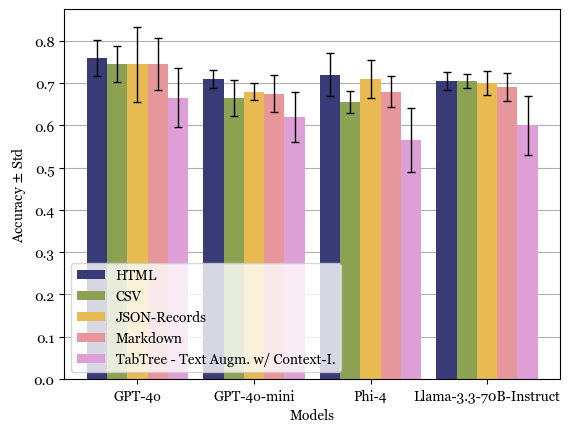

In [39]:
# Extract data for plotting
import textwrap
import matplotlib.cm as cm

models = list(model_dict.keys())
approaches = [approach["approach"] for approach in model_dict[models[0]]]
accuracies = [[approach["accuracy"] for approach in model_dict[model]] for model in models]
std_accuracies = [[approach["std_accuracy"] for approach in model_dict[model]] for model in models]

# Transpose the data to compare models instead of approaches
accuracies_transposed = list(map(list, zip(*accuracies)))
std_accuracies_transposed = list(map(list, zip(*std_accuracies)))

# Define colors for each domain
colors = cm.get_cmap('tab20b', 5)

# Plotting
fig, ax = plt.subplots()

x = np.arange(len(models)) * 1.15  # the label locationsnsns
width = 0.2  # the width of the bars

for i, (approach_name, acc, std_acc) in enumerate(zip(approaches, accuracies_transposed, std_accuracies_transposed)):
    ax.bar(
        x + i * width, acc, width,
        label=approach_name,
        yerr=std_acc, capsize=3,  # Reduce capsize for smaller end caps
        error_kw={'elinewidth': 1, 'capthick': 1, 'ls': 'dashed'},  # Thinner error bars, dashed style
        color=colors(i)
    )
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontname='Georgia')
ax.set_ylabel('Accuracy $\pm$ Std', fontname='Georgia')
ax.set_xticks(x + width * (len(approaches) - 1) / 2)


wrapped_labels = [textwrap.fill(label, 11) for label in models]
ax.set_xticklabels(wrapped_labels, fontname='Georgia', va='top')

ax.set_xticklabels(models, fontname='Georgia')

# Set y-axis tick labels font
for label in ax.get_yticklabels():
    label.set_fontname('Georgia')
    

ax.legend([approach_to_regular_name(approach_name) for approach_name in approaches], prop={'family': 'Georgia'})

ax.yaxis.grid(True, zorder=0)
ax.set_axisbelow(True)  # Move grid to background

plt.show()

# save figure to pdf
fig.savefig("../data/results/model_comparison.pdf", bbox_inches='tight')


In [40]:
# Plot 

### Question Category Analysis

In [41]:
#### OFFICIAL EVALUATOR ####
#### COPIED FROM: https://github.com/ppasupat/WikiTableQuestions/raw/master/evaluator.py ####


#!/usr/bin/env python
# -*- coding: utf-8 -*-
__version__ = "1.0.2"


################ Value Types ################

from abc import ABCMeta, abstractmethod
import argparse
from math import isinf, isnan
import os
import re
import sys
import unicodedata

from pydantic import BaseModel


class Value(object):
    __metaclass__ = ABCMeta

    # Should be populated with the normalized string
    _normalized = None

    @abstractmethod
    def match(self, other):
        """Return True if the value matches the other value.

        Args:
            other (Value)
        Returns:
            a boolean
        """
        pass

    @property
    def normalized(self):
        return self._normalized


class StringValue(Value):
    def __init__(self, content):
        assert isinstance(content, str)
        self._normalized = self.normalize(content)
        self._hash = hash(self._normalized)

    def __eq__(self, other):
        return isinstance(other, StringValue) and self.normalized == other.normalized

    def __hash__(self):
        return self._hash

    def __str__(self):
        return "S" + str([self.normalized])

    __repr__ = __str__

    def match(self, other):
        assert isinstance(other, Value)
        return self.normalized == other.normalized

    ################ String Normalization ################
    @staticmethod
    def normalize(x):
        if not isinstance(x, str):
            x = x.decode("utf8", errors="ignore")
        # Remove diacritics
        x = "".join(
            c
            for c in unicodedata.normalize("NFKD", x)
            if unicodedata.category(c) != "Mn"
        )
        # Normalize quotes and dashes
        x = re.sub(r"[‘’´`]", "'", x, flags=re.UNICODE)
        x = re.sub(r"[“”]", '"', x, flags=re.UNICODE)
        x = re.sub(r"[‐‑‒–—−]", "-", x, flags=re.UNICODE)
        while True:
            old_x = x
            # Remove citations
            x = re.sub(
                r"((?<!^)\[[^\]]*\]|\[\d+\]|[•♦†‡*#+])*$",
                "",
                x.strip(),
                flags=re.UNICODE,
            )
            # Remove details in parenthesis
            x = re.sub(r"(?<!^)( \([^)]*\))*$", "", x.strip())
            # Remove outermost quotation mark
            x = re.sub(r'^"([^"]*)"$', r"\1", x.strip())
            if x == old_x:
                break
        # Remove final '.'
        if x and x[-1] == ".":
            x = x[:-1]
        # Collapse whitespaces and convert to lower case
        x = re.sub(r"\s+", " ", x, flags=re.UNICODE).lower().strip()
        return x


class NumberValue(Value):
    def __init__(self, amount, original_string=None):
        assert isinstance(amount, (int, float))
        if abs(amount - round(amount)) < 1e-6:
            self._amount = int(amount)
        else:
            self._amount = float(amount)
        if not original_string:
            self._normalized = str(self._amount)
        else:
            self._normalized = StringValue.normalize(original_string)
        self._hash = hash(self._amount)

    @property
    def amount(self):
        return self._amount

    @staticmethod
    def remove_thousands_separators(text: str) -> str:
        return re.sub(r"(?<=\d),(?=\d{3}(?:\D|$))", "", text)

    def __eq__(self, other):
        return isinstance(other, NumberValue) and self.amount == other.amount

    def __hash__(self):
        return self._hash

    def __str__(self):
        return ("N(%f)" % self.amount) + str([self.normalized])

    __repr__ = __str__

    def match(self, other):
        assert isinstance(other, Value)
        if self.normalized == other.normalized:
            return True
        if isinstance(other, NumberValue):
            return abs(self.amount - other.amount) < 1e-6
        return False

    @staticmethod
    def parse(text):
        """Try to parse into a number.

        Return:
            the number (int or float) if successful; otherwise None.
        """
        try:
            text = NumberValue.remove_thousands_separators(text)
            return int(text)
        except:
            try:
                amount = float(text)
                assert not isnan(amount) and not isinf(amount)
                return amount
            except:
                return None


class DateValue(Value):

    def __init__(self, year, month, day, original_string=None):
        """Create a new DateValue. Placeholders are marked as -1."""
        assert isinstance(year, int)
        assert isinstance(month, int) and (month == -1 or 1 <= month <= 12)
        assert isinstance(day, int) and (day == -1 or 1 <= day <= 31)
        assert not (year == month == day == -1)
        self._year = year
        self._month = month
        self._day = day
        if not original_string:
            self._normalized = "{}-{}-{}".format(
                year if year != -1 else "xx",
                month if month != -1 else "xx",
                day if day != "-1" else "xx",
            )
        else:
            self._normalized = StringValue.normalize(original_string)
        self._hash = hash((self._year, self._month, self._day))

    @property
    def ymd(self):
        return (self._year, self._month, self._day)

    def __eq__(self, other):
        return isinstance(other, DateValue) and self.ymd == other.ymd

    def __hash__(self):
        return self._hash

    def __str__(self):
        return ("D(%d,%d,%d)" % (self._year, self._month, self._day)) + str(
            [self._normalized]
        )

    __repr__ = __str__

    def match(self, other):
        assert isinstance(other, Value)
        if self.normalized == other.normalized:
            return True
        if isinstance(other, DateValue):
            return self.ymd == other.ymd
        return False

    @staticmethod
    def parse(text):
        """Try to parse into a date.

        Return:
            tuple (year, month, date) if successful; otherwise None.
        """
        try:
            ymd = text.lower().split("-")
            assert len(ymd) == 3
            year = -1 if ymd[0] in ("xx", "xxxx") else int(ymd[0])
            month = -1 if ymd[1] == "xx" else int(ymd[1])
            day = -1 if ymd[2] == "xx" else int(ymd[2])
            assert not (year == month == day == -1)
            assert month == -1 or 1 <= month <= 12
            assert day == -1 or 1 <= day <= 31
            return (year, month, day)
        except:
            return None


################ Batch Mode ################


class OfficialEvaluator(BaseModel):
    """Official Evaluator for WikiTableQuestions Dataset

    There are 3 value types
    1. String (unicode)
    2. Number (float)
    3. Date (a struct with 3 fields: year, month, and date)
    Some fields (but not all) can be left unspecified. However, if only the year
    is specified, the date is automatically converted into a number.

    Target denotation = a set of items
    - Each item T is a raw unicode string from Mechanical Turk
    - If T can be converted to a number or date (via Stanford CoreNLP), the
        converted value (number T_N or date T_D) is precomputed

    Predicted denotation = a set of items
    - Each item P is a string, a number, or a date
    - If P is read from a text file, assume the following
    - A string that can be converted into a number (float) is converted into a
        number
    - A string of the form "yyyy-mm-dd" is converted into a date. Unspecified
        fields can be marked as "xx". For example, "xx-01-02" represents the date
        January 2nd of an unknown year.
    - Otherwise, it is kept as a string

    The predicted denotation is correct if
    1. The sizes of the target denotation and the predicted denotation are equal
    2. Each item in the target denotation matches an item in the predicted
        denotation

    A target item T matches a predicted item P if one of the following is true:
    1. normalize(raw string of T) and normalize(string form of P) are identical.
    The normalize method performs the following normalizations on strings:
    - Remove diacritics (é → e)
    - Convert smart quotes (‘’´`“”) and dashes (‐‑‒–—−) into ASCII ones
    - Remove citations (trailing •♦†‡*#+ or [...])
    - Remove details in parenthesis (trailing (...))
    - Remove outermost quotation marks
    - Remove trailing period (.)
    - Convert to lowercase
    - Collapse multiple whitespaces and strip outermost whitespaces
    2. T can be interpreted as a number T_N, P is a number, and P = T_N
    3. T can be interpreted as a date T_D, P is a date, and P = T_D
    (exact match on all fields; e.g., xx-01-12 and 1990-01-12 do not match)
    """

    ################ Value Instantiation ################

    @staticmethod
    def to_value(original_string, corenlp_value=None):
        """Convert the string to Value object.

        Args:
            original_string (basestring): Original string
            corenlp_value (basestring): Optional value returned from CoreNLP
        Returns:
            Value
        """
        if isinstance(original_string, Value):
            # Already a Value
            return original_string
        if not corenlp_value:
            corenlp_value = original_string
        # Number?
        amount = NumberValue.parse(corenlp_value)
        if amount is not None:
            return NumberValue(amount, original_string)
        # Date?
        ymd = DateValue.parse(corenlp_value)
        if ymd is not None:
            if ymd[1] == ymd[2] == -1:
                return NumberValue(ymd[0], original_string)
            else:
                return DateValue(ymd[0], ymd[1], ymd[2], original_string)
        # String.
        return StringValue(original_string)

    @staticmethod
    def to_value_list(original_strings, corenlp_values=None):
        """Convert a list of strings to a list of Values

        Args:
            original_strings (list[basestring])
            corenlp_values (list[basestring or None])
        Returns:
            list[Value]
        """
        assert isinstance(original_strings, (list, tuple, set))
        if corenlp_values is not None:
            assert isinstance(corenlp_values, (list, tuple, set))
            assert len(original_strings) == len(corenlp_values)
            return list(
                set(
                    OfficialEvaluator.to_value(x, y)
                    for (x, y) in zip(original_strings, corenlp_values)
                )
            )
        else:
            return list(set(OfficialEvaluator.to_value(x) for x in original_strings))

    ################ Check the Predicted Denotations ################

    @staticmethod
    def check_denotation(target_values, predicted_values):
        """Return True if the predicted denotation is correct.

        Args:
            target_values (list[Value])
            predicted_values (list[Value])
        Returns:
            bool
        """
        # Check size
        if len(target_values) != len(predicted_values):
            return False
        # Check items
        for target in target_values:
            if not any(target.match(pred) for pred in predicted_values):
                return False
        return True

    @staticmethod
    def tsv_unescape(x):
        """Unescape strings in the TSV file.
        Escaped characters include:
            newline (0x10) -> backslash + n
            vertical bar (0x7C) -> backslash + p
            backslash (0x5C) -> backslash + backslash

        Args:
            x (str or unicode)
        Returns:
            a unicode
        """
        return x.replace(r"\n", "\n").replace(r"\p", "|").replace("\\\\", "\\")

    @staticmethod
    def tsv_unescape_list(x):
        """Unescape a list in the TSV file.
        List items are joined with vertical bars (0x5C)

        Args:
            x (str or unicode)
        Returns:
            a list of unicodes
        """
        return [OfficialEvaluator.tsv_unescape(y) for y in x.split("|")]

    @staticmethod
    def main():
        parser = argparse.ArgumentParser()
        parser.add_argument(
            "-t",
            "--tagged-dataset-path",
            default=os.path.join(".", "tagged", "data"),
            help="Directory containing CoreNLP-tagged dataset TSV file",
        )
        parser.add_argument(
            "prediction_path",
            help="Path to the prediction file. Each line contains "
            "ex_id <tab> item1 <tab> item2 <tab> ...",
        )
        args = parser.parse_args()

        # ID string --> list[Value]
        target_values_map = {}
        for filename in os.listdir(args.tagged_dataset_path):
            filename = os.path.join(args.tagged_dataset_path, filename)
            print("Reading dataset from", filename, file=sys.stderr)
            with open(filename, "r", encoding="utf8") as fin:
                header = fin.readline().rstrip("\n").split("\t")
                for line in fin:
                    stuff = dict(zip(header, line.rstrip("\n").split("\t")))
                    ex_id = stuff["id"]
                    original_strings = OfficialEvaluator.tsv_unescape_list(
                        stuff["targetValue"]
                    )
                    canon_strings = OfficialEvaluator.tsv_unescape_list(
                        stuff["targetCanon"]
                    )
                    target_values_map[ex_id] = OfficialEvaluator.to_value_list(
                        original_strings, canon_strings
                    )
        print("Read", len(target_values_map), "examples", file=sys.stderr)

        print("Reading predictions from", args.prediction_path, file=sys.stderr)
        num_examples, num_correct = 0, 0
        with open(args.prediction_path, "r", encoding="utf8") as fin:
            for line in fin:
                line = line.rstrip("\n").split("\t")
                ex_id = line[0]
                if ex_id not in target_values_map:
                    print('WARNING: Example ID "%s" not found' % ex_id)
                else:
                    target_values = target_values_map[ex_id]
                    predicted_values = OfficialEvaluator.to_value_list(line[1:])
                    correct = OfficialEvaluator.check_denotation(
                        target_values, predicted_values
                    )
                    print(
                        "%s\t%s\t%s\t%s"
                        % (ex_id, correct, target_values, predicted_values)
                    )
                    num_examples += 1
                    if correct:
                        num_correct += 1
        print("Examples:", num_examples, file=sys.stderr)
        print("Correct:", num_correct, file=sys.stderr)
        print(
            "Accuracy:",
            round((num_correct + 1e-9) / (num_examples + 1e-9), 4),
            file=sys.stderr,
        )


In [42]:
import tiktoken


def num_tokens_from_string(string: str, encoding_name: str = "o200k_base") -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [43]:
from typing import List

def calculate_official_accuracy(
    predictions: List[str], ground_truths: List[str]
    ) -> tuple[float, List[bool]]:
    assert len(predictions) == len(
        ground_truths
    ), "Predictions and ground truths must have the same length."

    num_correct = 0
    num_examples = len(predictions)
    
    correct_list = []

    for pred, gt in zip(predictions, ground_truths):
        pred_values = OfficialEvaluator.to_value_list([pred])
        gt_values = OfficialEvaluator.to_value_list([gt])

        if len(gt_values) > 1:
            print(
                "Warning: Multiple ground truth values detected. Using the first one."
            )
        if OfficialEvaluator.check_denotation(gt_values, pred_values):
            correct_list.append(True)
            num_correct += 1
        else:
            correct_list.append(False)

    accuracy = num_correct / num_examples if num_examples > 0 else 0.0
    return accuracy, correct_list

In [44]:
document_summary_path = "../data/evaluation/dataset_analysis/analysis-2025-03-13-16-39-28.json"
document_summary = load_json(document_summary_path)


# 0: html, 1: plain text, # 2: csv
html_documents = document_summary[0]['dataset_summary']['document_list'][:200]
print("HTML Document Summary:")
print(html_documents[:5])

# load evaluation data ids
evaluation_sample_path = "../data/wiki_table_questions/evaluation_ids_200.json"
evaluation_sample_data = load_json(evaluation_sample_path)
print("Evaluation Sample Data:")
print(evaluation_sample_data[:5])

# load category mapper
path = "../data/wiki_table_questions/id_mapper_questions.json"
id_mapper_data = load_json(path)
print("ID Mapper Data:")
print(id_mapper_data[:5])

HTML Document Summary:
[{'id': '203-469', 'num_tokens': 546, 'num_characters': 1212}, {'id': '203-116', 'num_tokens': 834, 'num_characters': 1888}, {'id': '204-265', 'num_tokens': 1883, 'num_characters': 4863}, {'id': '204-336', 'num_tokens': 541, 'num_characters': 1718}, {'id': '203-346', 'num_tokens': 572, 'num_characters': 1599}]
Evaluation Sample Data:
[{'doc_id': '202-160', 'question_id': 'nt-2265', 'question': 'how many movements (up or down) did the team experience?'}, {'doc_id': '203-516', 'question_id': 'nt-6341', 'question': 'of the total number of pro football games played by eddie royal between the two years 2011 and 2012, what was the average number of games played during those two years by him?'}, {'doc_id': '204-490', 'question_id': 'nt-8577', 'question': 'which position was represented the most on the team?'}, {'doc_id': '204-320', 'question_id': 'nt-11168', 'question': 'how many nations share the seventh rank?'}, {'doc_id': '204-195', 'question_id': 'nt-3356', 'questio

In [45]:
from collections import defaultdict
import textwrap



questions = []
for i, sample in enumerate(evaluation_sample_data):
    question = {}
    
    document_summary_data = next(
        (item for item in html_documents if item["id"] == sample["doc_id"]), None)
    if not document_summary_data:
        raise ValueError(f"Document ID {sample['doc_id']} not found in Document Summary Data.")
    
    id_mapper_data_single = next(
        (item for item in id_mapper_data if item["question_id"] == sample["question_id"]), None)
    if not id_mapper_data_single:
        raise ValueError(f"Question ID {sample['question_id']} not found in ID Mapper Data.")
    
    question['doc_id'] = sample['doc_id']
    question['question_id'] = sample['question_id']
    question['question'] = sample['question']
    question['table_length'] = document_summary_data['num_tokens']
    question['category'] = id_mapper_data_single['category']
    
    questions.append(question)
        

tabtree_results = tabtree_gpt4o_mini_results
baseline_results = gpt4_mini_results

tabtree_predictions = [sample_dict['data']['predictions_parsed:'] for sample_dict in tabtree_results[0]['evaluation_results'][3]['qa_only_results']['qa_results']]
tabtree_predictions = [prediction for sample_predictions in tabtree_predictions for prediction in sample_predictions]
# html_phi4_predictions = phi4_results[0]['evaluation_results'][0]['qa_only_results']['qa_results']

html_predictions = [sample_dict['data']['predictions_parsed:'] for sample_dict in baseline_results[0]['evaluation_results'][0]['qa_only_results']['qa_results']]
html_predictions = [prediction for sample_predictions in html_predictions for prediction in sample_predictions]

ground_truths_html = [sample_dict['data']['ground_truths'] for sample_dict in baseline_results[0]['evaluation_results'][0]['qa_only_results']['qa_results']]
ground_truths_html = [ground_truth for sample_ground_truths in ground_truths_html for ground_truth in sample_ground_truths]
correct_list_html = calculate_official_accuracy(html_predictions, ground_truths_html)[1]

ground_truths_tabtree = [sample_dict['data']['ground_truths'] for sample_dict in tabtree_results[0]['evaluation_results'][3]['qa_only_results']['qa_results']]
ground_truths_tabtree = [ground_truth for sample_ground_truths in ground_truths_tabtree for ground_truth in sample_ground_truths]
correct_list_tabtree = calculate_official_accuracy(tabtree_predictions, ground_truths_tabtree)[1]

assert ground_truths_html == ground_truths_tabtree
ground_truths = ground_truths_html

for i, dict_item in enumerate(questions):
    dict_item['ground_truth'] = ground_truths[i]
    dict_item['tabtree_phi4'] = tabtree_predictions[i]
    dict_item['html_phi4'] = html_predictions[i]
    dict_item['correct_list_html'] = correct_list_html[i]
    dict_item['correct_list_phi4'] = correct_list_tabtree[i]


### Generate Question Category Plot

{
    "advanced lookup": {
        "html": 50,
        "phi_4": 37,
        "count": 77
    },
    "position related": {
        "html": 9,
        "phi_4": 12,
        "count": 14
    },
    "calculation": {
        "html": 14,
        "phi_4": 13,
        "count": 22
    },
    "lookup": {
        "html": 61,
        "phi_4": 55,
        "count": 77
    },
    "boolean": {
        "html": 8,
        "phi_4": 7,
        "count": 10
    }
}
HTML Accuracies: [0.7922077922077922, 0.8, 0.6493506493506493, 0.6363636363636364, 0.6428571428571429]
Phi-4 Accuracies: [0.7142857142857143, 0.7, 0.4805194805194805, 0.5909090909090909, 0.8571428571428571]


/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_98229/3050950433.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', 2)


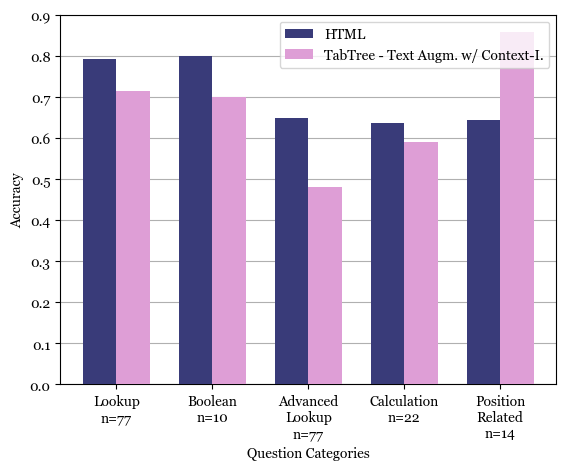

In [ ]:
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Georgia'

# calculate accuracy for each category
category_accuracy = {category: {"html": 0, "phi_4": 0, "count": 0} for category in set([doc["category"] for doc in id_mapper_data])}

for doc in questions:
    category = doc["category"]
    if doc["correct_list_html"]:
        category_accuracy[category]["html"] += 1
    if doc["correct_list_phi4"]:
        category_accuracy[category]["phi_4"] += 1
        
    category_accuracy[category]["count"] += 1
        
print(json.dumps(category_accuracy, indent=4))

# plot accuracy for each category as grouped bar chart for phi-4 vs html
categories = ["lookup", "boolean", "advanced lookup", "calculation", "position related"]


html_accuracies = [category_accuracy[cat]["html"] / category_accuracy[cat]["count"] for cat in categories]
phi4_accuracies = [category_accuracy[cat]["phi_4"] / category_accuracy[cat]["count"] for cat in categories]

print(f"HTML Accuracies: {html_accuracies}")
print(f"Phi-4 Accuracies: {phi4_accuracies}")
# Wrap labels if they are too long

wrapped_labels = []
for label in categories:
    wrapped_label = textwrap.fill(" ".join(word.capitalize() for word in label.split()), 11)
    wrapped_label += f"\nn={category_accuracy[label]['count']}"
    wrapped_labels.append(wrapped_label)



# Define colors for each category
colors = cm.get_cmap('tab20b', 2)

fig, ax = plt.subplots()
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, html_accuracies, width, label='HTML', color=colors(0), zorder=3)
rects2 = ax.bar(x + width/2, phi4_accuracies, width, label='TabTree - Text Augm. w/ Context-I.' , color=colors(1), zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontname='Georgia')
ax.set_xlabel('Question Categories', fontname='Georgia')
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels, fontname='Georgia')
ax.legend(prop={'family': 'Georgia'})

ax.yaxis.grid(True, zorder=0)
ax.set_axisbelow(True)  # Move grid to background

plt.show()

# save plot to pdf
fig.savefig("../data/results/accuracy_by_category.pdf", bbox_inches='tight')



    

    


### Table Length Analysis

{250: {'html': 0, 'phi_4': 0, 'count': 0}, 500: {'html': 0, 'phi_4': 0, 'count': 0}, 1000: {'html': 0, 'phi_4': 0, 'count': 0}, 2000: {'html': 0, 'phi_4': 0, 'count': 0}, 8000: {'html': 0, 'phi_4': 0, 'count': 0}}
['0-250\nn=32\n', '250-500\nn=73\n', '500-1,000\nn=55\n', '1,000-2,000\nn=36\n', '> 2,000\nn=4\n']
HTML Accuracies: [0.75, 0.7534246575342466, 0.6727272727272727, 0.6666666666666666, 0.5]
Phi-4 Accuracies: [0.625, 0.6986301369863014, 0.5454545454545454, 0.6111111111111112, 0.25]


/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_98229/830271872.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', 2)


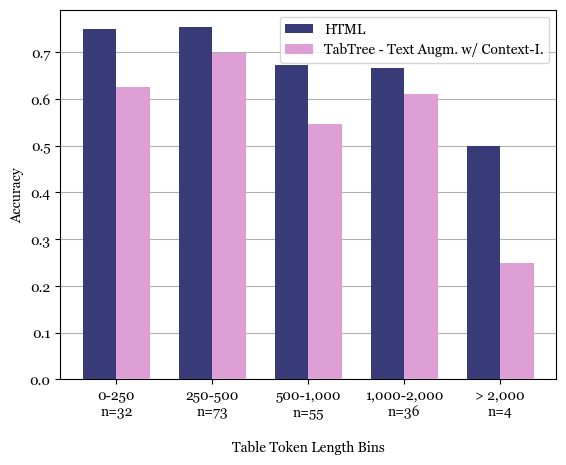

In [47]:
# generate bins for table length
table_lengths = [doc["table_length"] for doc in questions]
table_lengths = sorted(table_lengths)

# make the bins logarithmic with more bins
table_length_bins = [250, 500, 1000, 2000, 8000]


# calculate accuracy for each bin
table_length_accuracy = {table_length: {"html": 0, "phi_4": 0, "count": 0} for table_length in table_length_bins}

print(table_length_accuracy)

for doc in questions:
    table_length = doc["table_length"]
    bin_index = np.digitize(table_length, table_length_bins)
    bin_index = table_length_bins[bin_index - 1]
    
    if doc["correct_list_html"]:
        table_length_accuracy[bin_index]["html"] += 1
    if doc["correct_list_phi4"]:
        table_length_accuracy[bin_index]["phi_4"] += 1
        
    table_length_accuracy[bin_index]["count"] += 1
    
    
table_length_bins_descriptions = []
for bin_index, bin_description in enumerate(["0-250", "250-500", "500-1,000", "1,000-2,000", "> 2,000"]):
    table_length_bins_descriptions.append(bin_description + f"\nn={table_length_accuracy[table_length_bins[bin_index]]['count']}\n")

print(table_length_bins_descriptions)
# plot the bins as grouped bar chart for phi-4 vs html

# Extract data for plotting
bins = list(table_length_accuracy.keys())
html_accuracies = [table_length_accuracy[bin]["html"] / table_length_accuracy[bin]["count"] if table_length_accuracy[bin]["count"] > 0 else 0 for bin in bins] 
phi4_accuracies = [table_length_accuracy[bin]["phi_4"] / table_length_accuracy[bin]["count"] if table_length_accuracy[bin]["count"] > 0 else 0 for bin in bins]


print(f"HTML Accuracies: {html_accuracies}")
print(f"Phi-4 Accuracies: {phi4_accuracies}")
# Define colors for each domain
colors = cm.get_cmap('tab20b', 2)

# Plotting
fig, ax = plt.subplots()

x = np.arange(len(bins))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, html_accuracies, width, label='HTML', color=colors(0), zorder=3)
rects2 = ax.bar(x + width/2, phi4_accuracies, width, label='TabTree - Text Augm. w/ Context-I.', color=colors(1), zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontname='Georgia')
ax.set_xlabel('Table Token Length Bins', fontname='Georgia')
ax.set_xticks(x)
ax.set_xticklabels(table_length_bins_descriptions, fontname='Georgia')
ax.legend(prop={'family': 'Georgia'})

ax.yaxis.grid(True, zorder=0)
ax.set_axisbelow(True)  # Move grid to background

plt.show()

# save plot to pdf
fig.savefig("../data/results/accuracy_by_table_length.pdf", bbox_inches='tight')
